In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
#1 Import Data into Python environment
dataset = pd.read_csv(r'C:\Users\dhruv\Desktop\Comcast_telecom_complaints_data.csv')

In [83]:
dataset.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,6/12/2015,6-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,6/1/2015,6-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [84]:
dataset.shape

(2224, 11)

In [85]:
dataset.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [86]:
dataset.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [87]:
dataset['Date_Index'] = dataset['Date_month_year'] + "  " + dataset['Time']

In [88]:
dataset['Date_month_year'] = pd.to_datetime(dataset['Date_month_year'])
dataset['Date_Index'] = pd.to_datetime(dataset['Date_Index'])

In [89]:
dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date_Index                     datetime64[ns]
dtype: object

In [90]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Index
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,4/8/2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


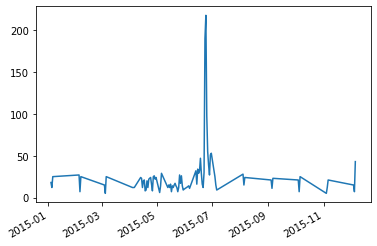

In [91]:
# Trend chart for the number of complaints at monthly levels.

dataset['Date_month_year'].value_counts().plot()

In [92]:
dataset['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [93]:
#User Defined Function for creating new Categorial Varial.
def statusCat(status):
    if status == 'Open' or status == 'Pending':
        return 'Open'
    else:
        return 'Closed'

In [94]:
#Categorial Varial, which contains Open and Closed status for any complaint.
dataset['Status_Category'] = dataset['Status'].apply(statusCat)

In [95]:
dataset.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Index,Status_Category
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
1,223441,Payment disappear - service got disconnected,4/8/2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,6/12/2015,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015-06-23 18:56:14,Closed
8,318072,Comcast extended outages,6/1/2015,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015-01-06 23:46:30,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28 18:46:31,Open


In [96]:
#Grouping State and Satus_Category
Statewise_Status = dataset.groupby(['State', 'Status_Category']).size().unstack().fillna(0)
Statewise_Status

Status_Category,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


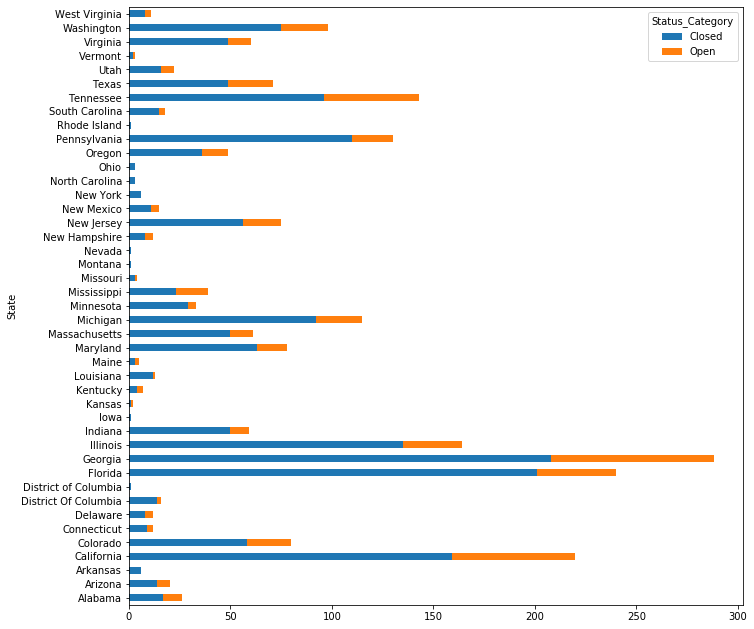

In [97]:
#Statewise complaint Status in Stacked Bar-Chart.
Statewise_Status.plot(kind = 'barh', figsize = (11,11), stacked = True)

In [98]:
#Total Numbers of Complaints Statewise.
most_complaint = dataset.groupby(['State']).size().sort_values(ascending = False)
most_complaint

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
New Hampshire            12
Connecticut              12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [99]:
#State with Maximum Complaints.
print("State with most Complaint: {}".format(most_complaint[:1]))

State with most Complaint: State
Georgia    288
dtype: int64


In [100]:
#Dataset of Unresolved Complaints.
Unresolved_complaint = dataset[dataset['Status_Category'].str.contains('Open')==True]
Unresolved_complaint

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Index,Status_Category
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015-06-24 10:13:55,Open
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015-06-28 18:46:31,Open
12,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,2015-06-13,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,2015-06-13 16:03:18,Open
15,370137,Internet complaint,27-06-15,2015-06-27,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,2015-06-27 15:25:03,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,339481,Terrible internet service from Comcast,13-06-15,2015-06-13,7:14:02 PM,Customer Care Call,Woodbridge,Virginia,22191,Open,No,2015-06-13 19:14:02,Open
2202,305166,comcst data cap,24-05-15,2015-05-24,12:34:08 AM,Customer Care Call,Woodstock,Georgia,30188,Open,Yes,2015-05-24 00:34:08,Open
2208,374570,comcast cap,30-06-15,2015-06-30,12:42:45 PM,Customer Care Call,Woodstock,Georgia,30188,Pending,No,2015-06-30 12:42:45,Open
2218,338192,"Speed throttling, speeds not at promised output",6/12/2015,2015-12-06,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,2015-12-06 18:35:59,Open


In [101]:
#Total Number of Unresolved complaints State wise.
most_unresolvedcomp = Unresolved_complaint.groupby(['State','Status_Category']).size().sort_values(ascending = False)
most_unresolvedcomp

State                 Status_Category
Georgia               Open               80
California            Open               61
Tennessee             Open               47
Florida               Open               39
Illinois              Open               29
Michigan              Open               23
Washington            Open               23
Colorado              Open               22
Texas                 Open               22
Pennsylvania          Open               20
New Jersey            Open               19
Mississippi           Open               16
Maryland              Open               15
Oregon                Open               13
Virginia              Open               11
Massachusetts         Open               11
Indiana               Open                9
Alabama               Open                9
Utah                  Open                6
Arizona               Open                6
Minnesota             Open                4
New Hampshire         Open            

In [102]:
#State with Maximum Unresolved Complaints.
print("State with most unresolved Complaint: {}".format(most_unresolvedcomp[:1]))

State with most unresolved Complaint: State    Status_Category
Georgia  Open               80
dtype: int64


In [103]:
#Dataset with Resolved Complaints.
Resolved_complaint = dataset[dataset['Status_Category'].str.contains('Closed') == True]
Resolved_complaint.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Index,Status_Category
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
1,223441,Payment disappear - service got disconnected,4/8/2015,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,6/12/2015,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-12-06 21:59:40,Closed


In [104]:
#Number of Resolved Complaints and Their mode of receiving.
Resolved_complaint_grouped = Resolved_complaint.groupby(['Received Via', 'Status_Category']).size().unstack()
Resolved_complaint_grouped

Status_Category,Closed
Received Via,
Customer Care Call,864
Internet,843


In [105]:
#User Defined Function for converting Closed complaints numbers into percentage.
def percent(data):
    percentage = (data/1000)*100
    return percentage

In [106]:
Resolved_complaint_grouped['Closed'] = Resolved_complaint_grouped['Closed'].apply(percent)

In [107]:
#Percentage of Resolved Complaints.
Resolved_complaint_grouped

Status_Category,Closed
Received Via,
Customer Care Call,86.4
Internet,84.3
